In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
prompt16 = "Simulate Trypsin (1TRN) for 1ns at 300K and compute SASA."
llm_var = "gpt-4o-2024-05-13"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-07-25
time: 13:43:01
LLM:  gpt-4o-2024-05-13 
Temperature:  0.1


In [3]:
agent.run(prompt16)

Thought: To simulate Trypsin (1TRN) for 1ns at 300K and compute the Solvent Accessible Surface Area (SASA), I will first need to download the PDB file for Trypsin (1TRN). Then, I will set up and run the molecular dynamics simulation. Finally, I will compute the SASA from the resulting trajectory.

Action: 
```
{
  "action": "PDBFileDownloader",
  "action_input": {
    "query": "1TRN"
  }
}
```PDB file found with this ID: 1TRN


2024-07-25 13:43:04.328 
  command:

    streamlit run /Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


To proceed with the simulation of Trypsin (1TRN) for 1ns at 300K, I will set up and run the molecular dynamics simulation using the downloaded PDB file. After the simulation, I will compute the Solvent Accessible Surface Area (SASA) from the resulting trajectory.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1TRN_134304",
    "forcefield_files": [],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME",
      "nonbondedCutoff": "1 * nanometers",
      "ewaldErrorTolerance": 0.0005,
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.00001,
      "solvate": true
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {
      "Ensemble": "NPT",
      "Number of Steps": 500000,
      "record_interval_

('Final Answer: The molecular dynamics simulation of Trypsin (1TRN) for 1ns at 300K has been successfully completed. The Solvent Accessible Surface Area (SASA) has been computed from the resulting trajectory. The SASA values are saved with File ID `sasa_sim0_134322`, and the plot of the SASA analysis is saved with plot ID `fig0_202601`.',
 '6VGCNZB7')

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-07-25
time: 20:26:06
Files found in registry: 1TRN_134304: PDB file downloaded from RSCB
 PDBFile ID: 1TRN_134304
 1TRN_134316: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_134322: Initial positions for simulation sim0_134322
 sim0_134322: Basic Simulation of Protein 1TRN_134316
 rec0_134326: Simulation trajectory for protein 1TRN_134316 and simulation sim0_134322
 rec1_134326: Simulation state log for protein 1TRN_134316 and simulation sim0_134322
 rec2_134326: Simulation pdb frames for protein 1TRN_134316 and simulation sim0_134322
 sasa_sim0_134322: Total SASA values for sim0_134322
 fig0_202601: Plot of SASA over time for sim0_134322


In [6]:
traj_path_1 = registry.get_mapped_path("rec0_134326") 
top_path_1 = registry.get_mapped_path("top_sim0_134322")

fig_path = registry.get_mapped_path("fig0_202601")

assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)
assert os.path.exists(fig_path)



Number of frames:  100


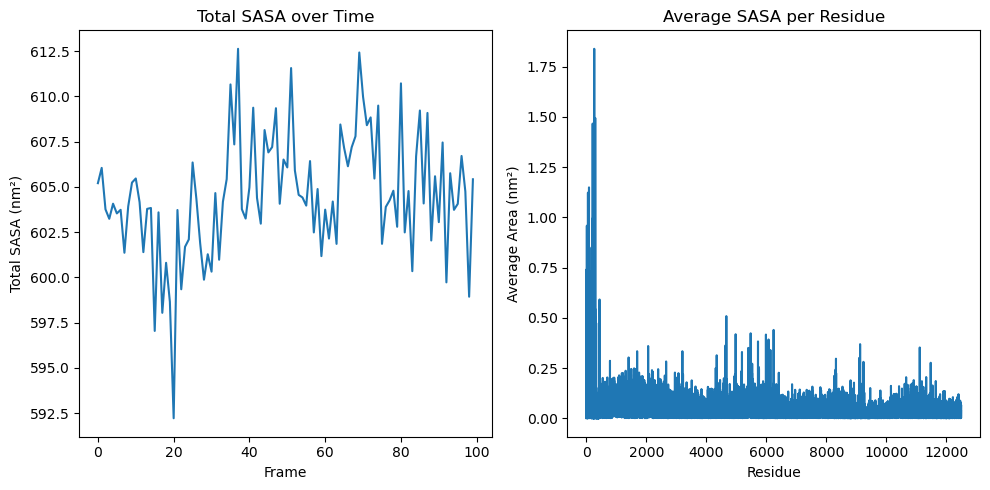

In [7]:
import mdtraj as md
import numpy as np
from IPython.display import display, Image
#print number of frames adn residues:
traj = md.load(traj_path_1, top=top_path_1)

print("Number of frames: ", traj.n_frames)
Image(filename=fig_path)


# Experiment Result:
### Completed without Exception or TimeOut Errors ✅
### Attempted all necessary steps ✅
### No hallucination ✅
### Logic make sense ✅
### Correct Answer  ✅